<a href="https://colab.research.google.com/github/kim-minsun/Data-Science_Project/blob/Kim/Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt
import seaborn as sns

In [15]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [16]:
data = pd.read_csv("coin_Bitcoin.csv")

In [17]:
#understanding the data

data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [18]:
data.tail()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
2857,2858,Bitcoin,BTC,2021-02-23 23:59:59,54204.929756,45290.590268,54204.929756,48824.426869,1.061025e+11,9.099259e+11
2858,2859,Bitcoin,BTC,2021-02-24 23:59:59,51290.136695,47213.498162,48835.087661,49705.333316,6.369552e+10,9.263931e+11
2859,2860,Bitcoin,BTC,2021-02-25 23:59:59,51948.966982,47093.853019,49709.082425,47093.853019,5.450657e+10,8.777661e+11
2860,2861,Bitcoin,BTC,2021-02-26 23:59:59,48370.785260,44454.842114,47180.464054,46339.760083,3.509679e+11,8.637523e+11
2861,2862,Bitcoin,BTC,2021-02-27 23:59:59,48253.270101,45269.025766,46344.772237,46188.451275,4.591095e+10,8.609781e+11


In [19]:
data.describe() 

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2862.00000,2862.000000,2862.000000,2862.000000,2862.000000,2.862000e+03,2.862000e+03
mean,1431.50000,4974.040239,4695.103027,4836.306834,4852.092547,8.978475e+09,8.591622e+10
std,826.33256,7188.836678,6667.197596,6933.573446,6975.105869,1.658135e+10,1.287414e+11
min,1.00000,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08
25%,716.25000,426.047752,415.675751,421.204506,420.989243,2.786250e+07,5.988997e+09
50%,1431.50000,1197.334961,1164.174988,1180.100037,1182.809998,3.301950e+08,1.924238e+10
75%,2146.75000,8138.046589,7703.357500,7924.612338,7926.696939,1.296743e+10,1.387658e+11
max,2862.00000,58330.572142,55672.609513,57532.738864,57539.943668,3.509679e+11,1.072263e+12


In [20]:
data.shape #to check the shape of the data for bitcoin 

(2862, 10)

In [21]:
data.columns

Index(['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close',
       'Volume', 'Marketcap'],
      dtype='object')

In [22]:
data.nunique() #displays the unique values 

SNo          2862
Name            1
Symbol          1
Date         2862
High         2852
Low          2856
Open         2855
Close        2849
Volume       2621
Marketcap    2861
dtype: int64

In [23]:
data['Marketcap'].unique()  #looking for specific unique value

array([1.60376886e+09, 1.54281312e+09, 1.29895459e+09, ...,
       8.77766126e+11, 8.63752275e+11, 8.60978135e+11])

In [24]:
#cleaning the data 

In [25]:
data.isnull().sum() #checking null values in the dataset 

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

In [26]:
crypto = 'DOGE'
currency = 'USD'

start = dt.datetime(2015,1,1)
end = dt.datetime.now()

data = web.DataReader(f"{crypto}-{currency}", "yahoo", start, end)

In [27]:
data.index = pd.to_datetime(data.index)

In [28]:
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-01,0.000186,0.000182,0.000186,0.000183,3.069130e+05,0.000183
2015-01-02,0.000187,0.000182,0.000183,0.000186,3.560170e+05,0.000186
2015-01-03,0.000186,0.000167,0.000184,0.000167,2.855740e+05,0.000167
2015-01-04,0.000169,0.000155,0.000168,0.000158,3.791500e+05,0.000158
2015-01-05,0.000166,0.000157,0.000159,0.000161,5.745520e+05,0.000161
...,...,...,...,...,...,...
2021-06-25,0.289145,0.230006,0.263480,0.239153,5.542163e+09,0.239153
2021-06-26,0.255127,0.230972,0.237673,0.244784,2.649457e+09,0.244784
2021-06-27,0.266891,0.240894,0.246045,0.264450,2.167522e+09,0.264450


In [29]:
#preparing the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [30]:
pred_days = 30 # number of days for the prediction

In [31]:
x_train, y_train = [], []

for x in range(pred_days, len(scaled_data)):
  x_train.append(scaled_data[x-pred_days:x, 0])
  y_train.append(scaled_data[x, 0])

In [32]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [33]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
74/74 [==============================] - 8s 43ms/step - loss: 0.0025
Epoch 2/30
74/74 [==============================] - 3s 44ms/step - loss: 0.0013
Epoch 3/30
74/74 [==============================] - 3s 43ms/step - loss: 0.0010
Epoch 4/30
74/74 [==============================] - 3s 44ms/step - loss: 0.0010
Epoch 5/30
74/74 [==============================] - 3s 44ms/step - loss: 8.6467e-04
Epoch 6/30
74/74 [==============================] - 3s 44ms/step - loss: 9.4726e-04
Epoch 7/30
74/74 [==============================] - 3s 43ms/step - loss: 8.9894e-04
Epoch 8/30
74/74 [==============================] - 3s 44ms/step - loss: 7.0957e-04
Epoch 9/30
74/74 [==============================] - 3s 43ms/step - loss: 0.0011
Epoch 10/30
74/74 [==============================] - 3s 43ms/step - loss: 9.5719e-04
Epoch 11/30
74/74 [==============================] - 3s 43ms/step - loss: 0.0010
Epoch 12/30
74/74 [==============================] - 3s 43ms/step - loss: 7.0848e-04
Epoch 13/30
7

In [34]:
test_start = dt.datetime(2021,6,1)
test_end = dt.datetime.now()

test_data = web.DataReader(f"{crypto}-{currency}", "yahoo", test_start, test_end)

In [35]:
test_data.index = pd.to_datetime(test_data.index)

In [36]:
test_data #displaying the current data until the exact date provided 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-06-01,0.383079,0.312360,0.325744,0.370077,5796031087,0.370077
2021-06-02,0.444590,0.352588,0.370302,0.423374,11425588479,0.423374
2021-06-03,0.440763,0.378819,0.423739,0.399963,6809900030,0.399963
2021-06-04,0.400982,0.351442,0.400982,0.376323,5889983048,0.376323
2021-06-05,0.393886,0.360488,0.376752,0.372177,3464039041,0.372177
2021-06-06,0.376798,0.367254,0.371676,0.371807,1836611411,0.371807
2021-06-07,0.379678,0.329806,0.371566,0.331050,3043974994,0.331050
2021-06-08,0.341435,0.296660,0.331822,0.327687,3918487504,0.327687
2021-06-09,0.353762,0.313131,0.326423,0.343331,3154332929,0.343331


In [37]:
actual_prices = test_data['Close']

In [38]:
actual_prices = np.array(actual_prices)
actual_prices

array([0.37007701, 0.423374  , 0.39996299, 0.37632301, 0.372177  ,
       0.37180701, 0.33105001, 0.327687  , 0.34333101, 0.32635099,
       0.319359  , 0.31208399, 0.32438201, 0.33208501, 0.328381  ,
       0.30776101, 0.30649599, 0.29347199, 0.28735599, 0.2809    ,
       0.178691  , 0.19103099, 0.23217399, 0.26278201, 0.239153  ,
       0.244784  , 0.26445001, 0.25685701, 0.27080578])

In [39]:
total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

In [40]:
total_dataset.index = pd.to_datetime(total_dataset.index)

In [41]:
model_inputs = total_dataset[len(total_dataset)-len(test_data)-pred_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.fit_transform(model_inputs)

In [42]:
x_test = []

for x in range(pred_days, len(model_inputs)):
  x_test.append(model_inputs[x-pred_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [43]:
prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

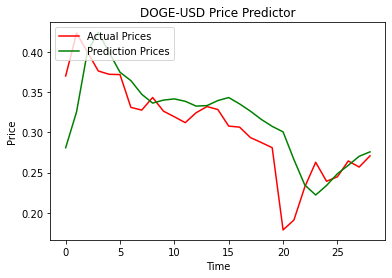

In [44]:
plt.plot(actual_prices, color='red', label='Actual Prices')
plt.plot(prediction_prices, color='green', label='Prediction Prices')
plt.title(f"{crypto}-{currency} Price Predictor")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend(loc="upper left")
plt.show()